In [32]:
M = 32

In [33]:
import re

import numpy as np
import pandas as pd

In [34]:
from tqdm.autonotebook import tqdm

## Importing Datasets

In [35]:
string_df = pd.read_csv("../../data/interim/string_df.csv", index_col=0)

balanced_pairs_df = pd.read_csv("../../data/train_test/test_pairs.csv", index_col=0)

balanced_pairs_df.drop_duplicates(inplace=True)
balanced_pairs_df.reset_index(drop=True, inplace=True)

In [36]:
string_df

,concatenated
label,
GooglePixel3A_L,0000000000000000000000000000000000000000000000...
GooglePixel3A_L,0000000000000000000000000000000000000000000000...
GooglePixel3A_L,0000000000000000000000000000000000000000000000...
GooglePixel3A_L,0000000000000000000000000000000000000000000000...
GooglePixel3A_L,0000000000000000000000000000000000000000000000...
...,...
iPhoneXSMax_M,0001101000101101000000000001101111111111000000...
iPhoneXSMax_M,0001101000101101010000000001101111111111000000...
iPhoneXSMax_M,0001101000101101000000000001101111111111000000...


In [37]:
balanced_pairs_df

,Item 1,Item 2,Equality,device1,device2
0,60,72,1,XiaomiRedmiNote7_S,XiaomiRedmiNote7_S
1,84,97,1,XiaomiRedmi5_J,XiaomiRedmi5_J
2,16,22,1,iPhoneXR_L,iPhoneXR_L
3,87,97,1,XiaomiRedmi5_J,XiaomiRedmi5_J
4,46,47,1,HuaweiHonor9_R,HuaweiHonor9_R
...,...,...,...,...,...
1995,25,40,-1,iPhoneXR_L,HuaweiHonor9_R
1996,49,107,-1,SamsungS7_I,XiaomiRedmiNote9S_T
1997,37,185,-1,HuaweiHonor9_R,GooglePixel3A_V
1998,156,186,-1,iPhone11_M,GooglePixel3A_V


## Importing Best Configurations

In [38]:
import re
import pandas as pd


def parse_log_file(filename):
    data = []

    with open(filename, "r") as file:
        lines = file.readlines()

        current_filter = None
        current_threshold = None
        current_min_error = None
        current_confidence = None

        for line in lines:
            if "Best Filter" in line:
                # Extract Best Filter using regex
                filter_match = re.search(r"Best Filter: (.+)", line)
                if filter_match:
                    current_filter = filter_match.group(1).strip()

            elif "Best Threshold" in line:
                # Extract Best Threshold using regex
                threshold_match = re.search(r"Best Threshold: (.+)", line)
                if threshold_match:
                    current_threshold = int(threshold_match.group(1).strip())

            elif "Min error" in line:
                # Extract Min Error using regex
                min_error_match = re.search(r"Min error: (.+)", line)
                if min_error_match:
                    current_min_error = float(min_error_match.group(1).strip())

            elif "Confidence" in line:
                # Extract Confidence using regex
                confidence_match = re.search(r"Confidence: (.+)", line)
                if confidence_match:
                    current_confidence = float(confidence_match.group(1).strip())

                    # Once we have all values, create a tuple and add it to the data list
                    data.append(
                        (
                            current_filter,
                            current_threshold,
                            current_min_error,
                            current_confidence,
                        )
                    )

                    # Reset current values for the next entry
                    current_filter = None
                    current_threshold = None
                    current_min_error = None
                    current_confidence = None

    # Convert the list of tuples into a DataFrame
    df = pd.DataFrame(
        data, columns=["Best Filter", "Best Threshold", "Min Error", "Confidence"]
    )

    return df

In [39]:
# Usage example:
filename = "../../reports/best_config"
best_configs_df = parse_log_file(filename)

In [40]:
# best_configs_df = best_configs_df.sort_values(by='Min Error').reset_index(drop=True)

In [41]:
best_configs_df

,Best Filter,Best Threshold,Min Error,Confidence
0,0[312] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1464],2,0.466147,0.135618
1,0[0] 🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫 0[1768],6,0.466313,0.134951
2,0[328] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1448],1,0.469633,0.121620
3,0[248] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1528],1,0.467389,0.130630
4,0[8] 🀫🀫🀫🀫🀫🀫🀫🀫 0[1768],3,0.466297,0.135016
5,0[1768] 🀆🀆🀆🀆🀫🀫🀫🀫 0[8],1,0.471781,0.112996
6,0[1752] 🀫🀫🀫🀫🀫🀫🀫🀫 0[24],1,0.470016,0.120079
7,0[240] 🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫 0[1528],1,0.471137,0.115582
8,0[1760] 🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫🀫 0[8],2,0.463862,0.144805
9,0[312] 🀆🀆🀆🀆🀫🀫🀫🀫 0[1464],1,0.464184,0.143508


In [42]:
if M != 0:
    best_configs_df = best_configs_df.head(M)

if M == 0:
    M = len(best_configs_df)

In [43]:
compression_rate = len(string_df["concatenated"].iloc[0]) / best_configs_df.shape[0]

print("Compression Rate:", compression_rate)

Compression Rate: 55.75


## Generate Matrix

In [44]:
def convertColumntoArray(df: pd.DataFrame, column_name: str) -> np.array:
    return np.array([list(bstr) for bstr in df[column_name]])

In [45]:
def generateStringPairDf(pairs_df: pd.DataFrame, dataset: pd.DataFrame) -> pd.DataFrame:
    # Convert the Probes column to a numpy array
    dataset_array = convertColumntoArray(dataset, "concatenated")

    return_df = pd.DataFrame()

    # Import the Probes into the pairs_df dataframe
    return_df["Item 1"] = pairs_df["Item 1"].apply(lambda index: dataset_array[index])
    return_df["Item 2"] = pairs_df["Item 2"].apply(lambda index: dataset_array[index])
    return_df["Equality"] = pairs_df["Equality"]

    return return_df

In [46]:
matrix_pairs_df = generateStringPairDf(balanced_pairs_df, string_df)
matrix_pairs_df.reset_index(inplace=True, drop=True)

## Filters Parser

In [47]:
def filter_parser(input_string: str) -> list:
    # Split the string into its parts
    parts = input_string.split()

    # Initialize the final array
    result = []

    # Process each part
    for part in parts:
        if part.startswith("0["):
            # Extract the number inside the brackets
            count = int(part[2:-1])
            # Append the corresponding number of zeros to the result
            result.extend([0] * count)
        else:
            # Translate the tiles to their respective values
            for char in part:
                if char == "🀆":
                    result.append(-1)
                elif char == "🀫":
                    result.append(1)

    return result

In [48]:
# import time

# time.sleep(100)

## Apply Filters

In [49]:
def apply_filter(item, filter):
    # item = np.array(list(item)).astype(int)
    item = item.astype(int)
    filter = filter_parser(filter)
    return np.sum(np.multiply(item, filter))

In [50]:
def apply_filter_threshold(item, filter, threshold) -> int:
    if apply_filter(item, filter) > threshold:
        return 1
    else:
        return -1

In [51]:
def apply_filter_threshold_pair(item_1, item_2, filter, threshold) -> int:
    if apply_filter_threshold(item_1, filter, threshold) == apply_filter_threshold(
        item_2, filter, threshold
    ):
        return 1
    else:
        return -1

## Calculate Fingerprint

In [52]:
def hamming_distance(array1, array2, confidence):
    # Check if arrays have the same length
    if len(array1) != len(array2):
        raise ValueError("Arrays must have the same length")

    # Initialize distance counter
    distance = 0

    # Iterate through arrays and count differences
    for i in range(len(array1)):
        if array1[i] != array2[i]:
            distance += confidence[i]

    distance = (distance / sum(confidence)) * len(confidence)

    return distance

In [53]:
def calculate_fingerprint(item_1, item_2, best_filters, best_thresholds, confidence):
    fingerprint_1 = []
    fingerprint_2 = []

    for best_filter, best_threshold in zip(best_filters, best_thresholds):
        filtered_1 = np.sum(np.multiply(item_1.astype(int), filter_parser(best_filter)))
        filtered_2 = np.sum(np.multiply(item_2.astype(int), filter_parser(best_filter)))

        if filtered_1 > best_threshold:
            filtered_1 = 1
        else:
            filtered_1 = -1

        if filtered_2 > best_threshold:
            filtered_2 = 1
        else:
            filtered_2 = -1

        fingerprint_1.append(filtered_1)
        fingerprint_2.append(filtered_2)

        distance = hamming_distance(fingerprint_1, fingerprint_2, confidence)

    return distance

In [54]:
for i, row in tqdm(matrix_pairs_df.iterrows(), total=matrix_pairs_df.shape[0]):
    # Extracting best filters and thresholds from the main DataFrame (assuming same filters and thresholds for simplicity)
    best_filters = best_configs_df["Best Filter"].tolist()
    best_thresholds = best_configs_df["Best Threshold"].tolist()
    confidence = best_configs_df["Confidence"].tolist()

    # Calculate the fingerprint using the relevant best filters and thresholds
    fingerprint = calculate_fingerprint(
        row["Item 1"], row["Item 2"], best_filters, best_thresholds, confidence
    )

    # Store the result in the 'distance' column (or any other processing you need)
    matrix_pairs_df.at[i, "h_distance"] = fingerprint

  0%|          | 0/2000 [00:00<?, ?it/s]

## H Distance Visualization

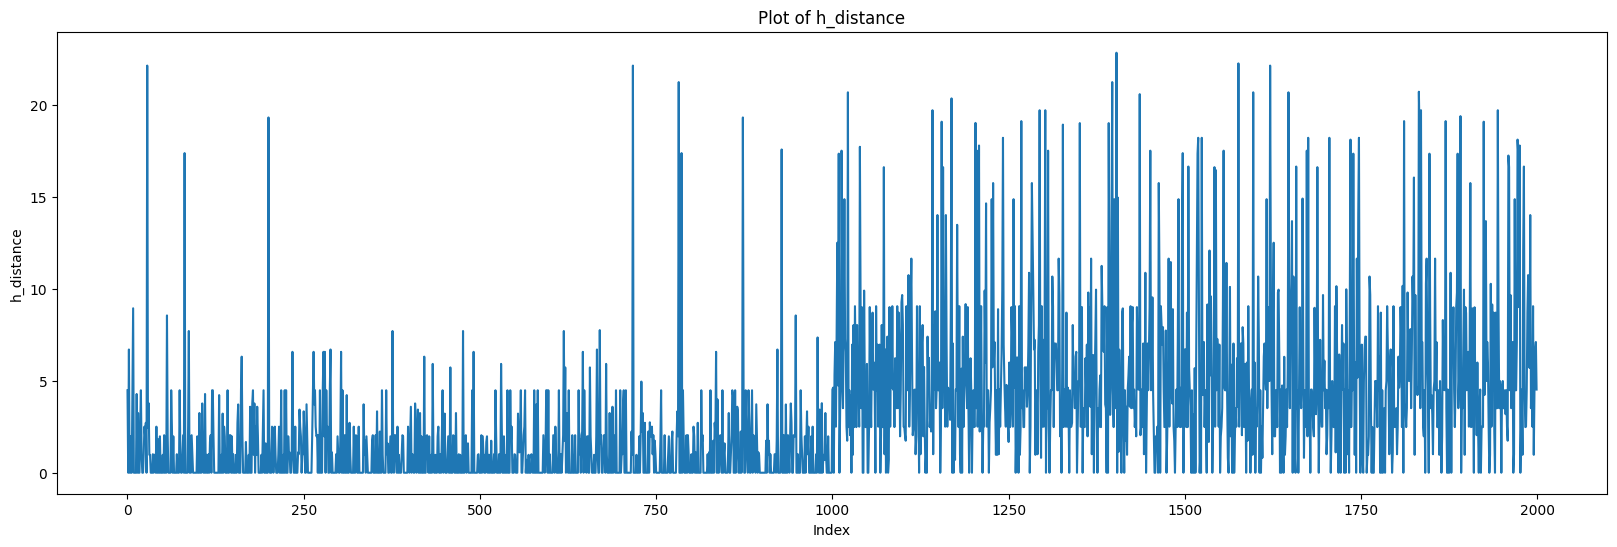

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))


# Assuming "matrix_pairs_df" is the DataFrame containing the "h_distance" column
plt.plot(matrix_pairs_df["h_distance"])
plt.xlabel("Index")
plt.ylabel("h_distance")
plt.title("Plot of h_distance")
plt.show()

## ROC

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

fprs = []
tprs = []
thresholds = []

taus = np.arange(1, len(best_configs_df) + 1, 0.001)

for tau in taus:
    predicted_labels = np.where(matrix_pairs_df["h_distance"] < tau, 1, -1)
    fpr, tpr, threshold = roc_curve(matrix_pairs_df["Equality"], predicted_labels)
    fprs.append(fpr)
    tprs.append(tpr)
    thresholds.append(threshold)

# Flatten the lists and sort by FPR
fpr_all = np.concatenate(fprs)
tpr_all = np.concatenate(tprs)
sorted_indices = np.argsort(fpr_all)
fpr_sorted = fpr_all[sorted_indices]
tpr_sorted = tpr_all[sorted_indices]

# Interpolate TPR values
fpr_unique = np.unique(fpr_sorted)
tpr_interpolated = np.interp(fpr_unique, fpr_sorted, tpr_sorted)

In [57]:
# Create a DataFrame
roc_data = pd.DataFrame(
    {
        "fpr": fpr_sorted,
        "tpr": tpr_sorted,
    }
)

# Save to CSV
roc_data.to_csv(f"../../reports/CSV/ROC/roc_curve_data_{M}.csv", index=False)

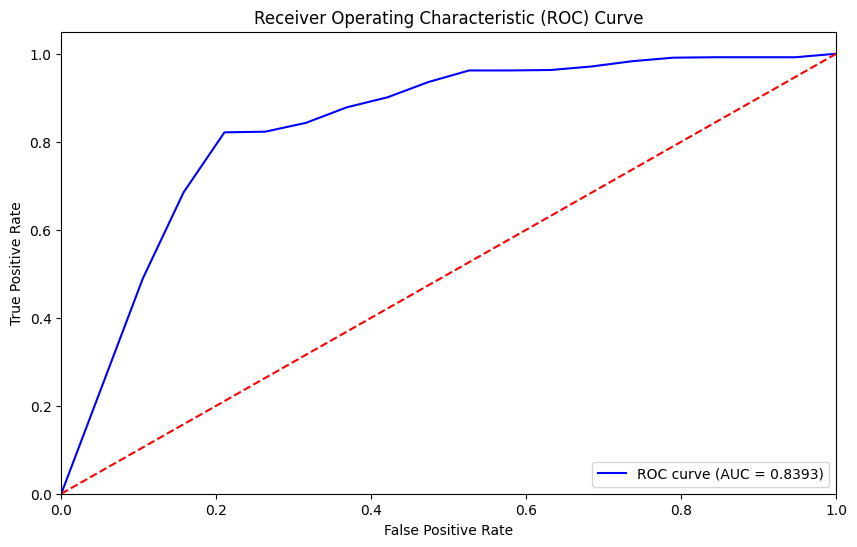

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming fpr_sorted and tpr_sorted are already defined and computed
# fpr_sorted = ...
# tpr_sorted = ...

# Calculate the area under the ROC curve
roc_auc = auc(fpr_sorted, tpr_sorted)

# Smooth the curve using linear interpolation
x_smooth = np.linspace(fpr_sorted.min(), fpr_sorted.max(), 20)
tpr_smooth = np.interp(x_smooth, fpr_sorted, tpr_sorted)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, tpr_smooth, color="blue", label="ROC curve (AUC = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [59]:
print("Compression Rate:", compression_rate)

Compression Rate: 55.75


## Reconstructed Plot

In [60]:
import os
import re
import pandas as pd
import numpy as np
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns


def plot_roc_curves_from_folder(folder_path, poly_degrees):
    # Get all CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

    # Initialize a figure for a square plot
    plt.figure(figsize=(8, 6))  # Adjust size as needed for your document layout

    # List to store line objects and their corresponding labels
    lines = []
    labels = []

    # Different line styles and markers
    line_styles = ["-", "--", "-.", ":"]
    markers = ["o", "s", "^", "d", "*"]
    style_count = 0

    # Iterate over each CSV file and polynomial degree
    for csv_file, poly_degree in zip(csv_files, poly_degrees):
        # Read CSV file into a DataFrame
        file_path = os.path.join(folder_path, csv_file)
        roc_data = pd.read_csv(file_path)

        # Extract data from DataFrame
        fpr = roc_data["fpr"]
        tpr = roc_data["tpr"]

        # Extract number of bits from filename using regex
        match = re.search(r"_(\d+)", csv_file)
        if match:
            bits = match.group(1)
        else:
            bits = "Unknown"

        # Interpolate using the specified polynomial degree
        coefficients = np.polyfit(fpr, tpr, poly_degree)
        poly = np.poly1d(coefficients)
        fpr_interpolated = np.linspace(0, 1, 100)  # Adjust number of points as needed
        tpr_interpolated = poly(fpr_interpolated)

        # Ensure the ROC curve starts from (0, 0)
        if fpr_interpolated[0] != 0 or tpr_interpolated[0] != 0:
            fpr_interpolated = np.insert(fpr_interpolated, 0, 0)
            tpr_interpolated = np.insert(tpr_interpolated, 0, 0)

        # Calculate AUC for interpolated curve
        roc_auc = auc(fpr_interpolated, tpr_interpolated)

        # Plot ROC curve with interpolated values and different line styles and markers
        line_style = line_styles[style_count % len(line_styles)]
        marker = markers[style_count % len(markers)]
        (line,) = plt.plot(
            fpr_interpolated,
            tpr_interpolated,
            linestyle=line_style,
            marker=marker,
            markevery=5,
            markersize=7,
            lw=2,
            label=f"{bits}-bit fingerprint (AUC = {roc_auc:.2f})",
        )

        # Collect line objects and labels for sorting
        lines.append(line)
        labels.append(f"{bits}-bit fingerprint (AUC = {roc_auc:.2f})")

        style_count += 1

    # Sort labels and lines by label
    lines_labels = sorted(zip(lines, labels), key=lambda x: x[1])
    lines, labels = zip(*lines_labels)

    # Plot the diagonal line
    plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")

    # Customize the plot for larger labels
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    # plt.title("Receiver Operating Characteristic (ROC) Curves with Interpolation", fontsize=16)

    # Customize the legend
    plt.legend(lines, labels, loc="lower right", fontsize=12)

    # Customize the tick parameters for larger ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Set finer grid with more lines
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.minorticks_on()  # Turn on the minor ticks for finer grid
    plt.tick_params(axis="both", which="both", direction="in", top=True, right=True)
    plt.grid(True, which="minor", color="gray", linestyle=":", linewidth=0.5)

    # Save the plot
    plt.savefig("../../reports/figures/ROC/ROC_bit_fingerprint.pdf")

    # Show the plot
    plt.show()

    # Close the plot to avoid overlap in future plots
    plt.close()

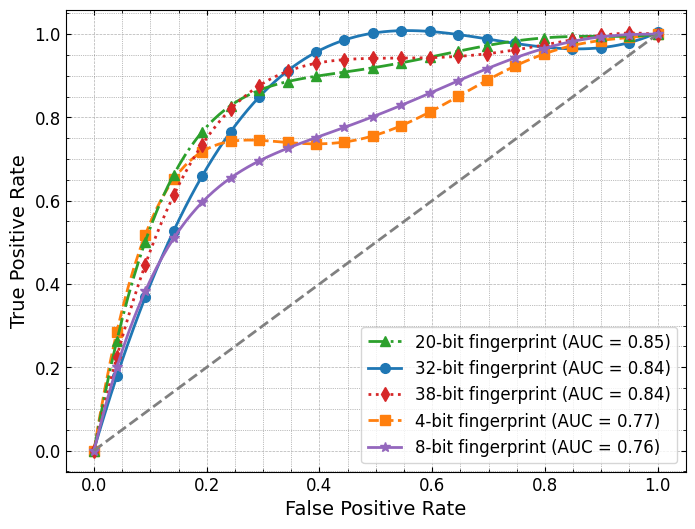

In [61]:
folder_path = "../../reports/CSV/ROC/"
poly_degrees = [3, 5, 6, 4, 5]  # List of polynomial degrees for each CSV file
plot_roc_curves_from_folder(folder_path, poly_degrees)

Best tau: 2.450000000000001
Maximum AUC: 0.8115000000000001


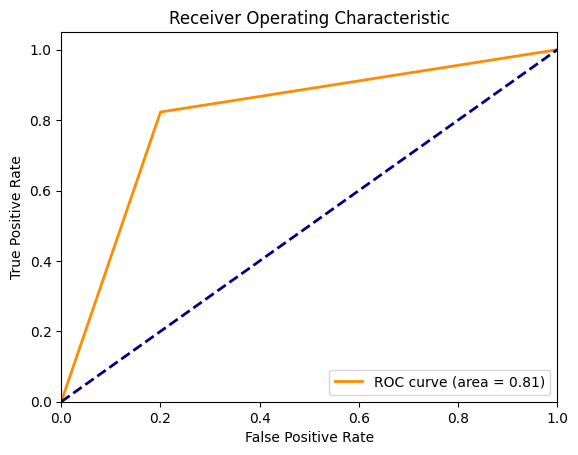

In [62]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'matrix_pairs_df' and 'best_configs_df' are already defined and loaded as dataframes

fprs = []
tprs = []
thresholds = []
aucs = []

taus = np.arange(1, len(best_configs_df) + 1, 0.01)

for tau in taus:
    predicted_labels = np.where(matrix_pairs_df["h_distance"] < tau, 1, -1)
    fpr, tpr, _ = roc_curve(matrix_pairs_df["Equality"], predicted_labels)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    fprs.append(fpr)
    tprs.append(tpr)

# Find the tau that maximizes the AUC
max_auc = max(aucs)
best_tau = taus[aucs.index(max_auc)]

print(f"Best tau: {best_tau}")
print(f"Maximum AUC: {max_auc}")

# Plotting the ROC curve for the best tau
best_tau_index = aucs.index(max_auc)
best_fpr = fprs[best_tau_index]
best_tpr = tprs[best_tau_index]

plt.figure()
plt.plot(
    best_fpr,
    best_tpr,
    color="darkorange",
    lw=2,
    label=f"ROC curve (area = {max_auc:.2f})",
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()